In [ ]:
# '=== Header Start ==='
# Title:       Section4_Classification_by_Regulon
# Author:      Wanqi Li
# Date:        20240604
# Purpose:     use jaccard index of regulon to extract TF clusters mentioned in Section 4
# Source Data: Joung, J. et al. A transcription factor atlas of directed differentiation. Cell 186, 209-229.e26 (2023).
# '=== Header End ==='

In [2]:
import pandas as pd
import numpy as np
import re
import pickle
import builtins
import multiprocessing as mp
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import os

In [132]:
regulon_E_isoform = pd.read_csv("../data/Dataset_TFAtlas/isoform/regulon_E_FC=2.5_p=0.05_distinct.csv", index_col=0)

In [133]:
# get isoform list
isoform_list = np.unique(regulon_E_isoform["tf"])
len(isoform_list)

3250

In [3]:
def wq_calculate_Jaccard_index(regulon_E, focus_TF1, focus_TF2):
    regulon_TF1 = regulon_E.loc[regulon_E["tf"] == focus_TF1,]
    regulon_TF2 = regulon_E.loc[regulon_E["tf"] == focus_TF2,]
    regulon_both = pd.merge(regulon_TF1[['target', 'ESC_mor']], regulon_TF2[['target', 'ESC_mor']])
    jaccard_index = len(regulon_both) / (len(regulon_TF1) + len(regulon_TF2) - len(regulon_both))
    return(jaccard_index)

In [5]:
def wq_calculate_Jaccard_index_by_TF(regulon_E, TF_list, focus_TF1,
                                     flag_save_pkl, path_pkl):
    jaccard_index_Mat_tmp = pd.DataFrame(data = np.zeros((len(TF_list), 1)))
    jaccard_index_Mat_tmp.index = TF_list
    jaccard_index_Mat_tmp.columns = [focus_TF1]

    regulon_TF1 = regulon_E.loc[regulon_E["tf"] == focus_TF1,]

    for focus_TF2 in jaccard_index_Mat_tmp.index:
        # jaccard_index_Mat_tmp.loc[focus_TF2, focus_TF1] = wq_calculate_Jaccard_index(regulon_E, focus_TF2, focus_TF1)
        regulon_TF2 = regulon_E.loc[regulon_E["tf"] == focus_TF2,]
        regulon_both = pd.merge(regulon_TF1[['target', 'ESC_mor']], regulon_TF2[['target', 'ESC_mor']])
        jaccard_index = len(regulon_both) / (len(regulon_TF1) + len(regulon_TF2) - len(regulon_both))
        jaccard_index_Mat_tmp.loc[focus_TF2, focus_TF1] = jaccard_index
    
    print("Handling", focus_TF1)
    
    if flag_save_pkl:
        print("Saving pkl\t" + focus_TF1)
        with builtins.open(path_pkl, 'wb') as f:
            pickle.dump(jaccard_index_Mat_tmp, f)

    return(jaccard_index_Mat_tmp)

In [ ]:
for focus_TF1 in isoform_list:
    print("Handling", focus_TF1)
    path_pkl = "../data/Dataset_TFAtlas/isoform/isoform_Jaccard_index/" + focus_TF1 + ".pkl"
    if os.path.exists(path_pkl):
        continue
    # wq_calculate_Jaccard_index_by_TF(regulon_E, focus_TF1,
    #                                  flag_save_pkl = True, path_pkl = path_pkl)
    p = mp.Process(target=wq_calculate_Jaccard_index_by_TF, args=(regulon_E_isoform, isoform_list, focus_TF1,
                                                                  True, path_pkl))
    p.start()

Handling TFORF0001-HIF3A
Handling TFORF0002-HIF3A
Handling TFORF0003-HIF3A
Handling TFORF0004-HIF3A
Handling TFORF0005-HIF3A
Handling TFORF0006-TULP4
Handling TFORF0007-TULP4
Handling TFORF0008-ZNF709
Handling TFORF0009-ZNF708
Handling TFORF0010-ZNF879
Handling TFORF0011-ZNF878
Handling TFORF0013-ZNF700
Handling TFORF0014-ZNF707
Handling TFORF0015-DRAP1
Handling TFORF0016-IRX5
Handling TFORF0017-IRX5
Handling TFORF0018-IRX4
Handling TFORF0019-IRX4
Handling TFORF0020-IRX6
Handling TFORF0021-IRX1
Handling TFORF0022-IRX3
Handling TFORF0023-IRX2
Handling TFORF0024-FOXQ1
Handling TFORF0027-ZNF44
Handling TFORF0028-ZNF44
Handling TFORF0029-ZNF43
Handling TFORF0030-ZNF43
Handling TFORF0031-ZNF43
Handling TFORF0032-GSC2
Handling TFORF0033-SP1
Handling TFORF0034-SP2
Handling TFORF0035-SP3
Handling TFORF0036-SP3
Handling TFORF0037-SP5
Handling TFORF0038-SP7
Handling TFORF0039-SP7
Handling TFORF0040-ZNF676
Handling TFORF0041-ZNF675
Handling TFORF0042-ZNF674
Handling TFORF0043-ZNF674
Handling TFOR

TFORF1971-YY2
Saving pkl	TFORF1971-YY2
Handling TFORF1981-TBX4
Saving pkl	TFORF1981-TBX4
Handling TFORF1857-NR4A2
Saving pkl	TFORF1857-NR4A2
Handling TFORF1900-PATZ1
Saving pkl	TFORF1900-PATZ1
Handling TFORF2023-NPAS3
Saving pkl	TFORF2023-NPAS3
Handling TFORF1993-ZHX3
Saving pkl	TFORF1993-ZHX3
Handling TFORF1912-TCF7L2
HandlingSaving pkl	TFORF1912-TCF7L2 
TFORF1992-ZHX3
Saving pkl	TFORF1992-ZHX3
Handling TFORF1868-MMP3
Saving pkl	TFORF1868-MMP3
Handling TFORF2064-NKX2-5
Saving pkl	TFORF2064-NKX2-5
Handling TFORF1968-YY1
Saving pkl	TFORF1968-YY1
Handling TFORF1910-TCF7L2
Saving pkl	TFORF1910-TCF7L2
Handling TFORF1967-PPARD
Saving pkl	TFORF1967-PPARD
Handling HandlingTFORF1869-POU2F1 
TFORF1944-MIER1Saving pkl	TFORF1869-POU2F1
Saving pkl	TFORF1944-MIER1

Handling TFORF2024-NPAS3
Saving pkl	TFORF2024-NPAS3
Handling TFORF2067-FLII
Saving pkl	TFORF2067-FLII
Handling TFORF1965-PPARD
Saving pkl	TFORF1965-PPARD
Handling TFORF1955-ESR2
Saving pkl	TFORF1955-ESR2
Handling TFORF2008-ZNF404
Saving 

In [ ]:
# merge all pkl
jaccard_index_Mat_isoform = pd.DataFrame()

path_pkl_folder = "../data/Dataset_TFAtlas/isoform/isoform_Jaccard_index/"
for focus_TF in isoform_list:
    with open(path_pkl_folder + focus_TF + ".pkl", 'rb') as f:
        jaccard_index_Mat_tmp = pickle.load(f)
    if len(jaccard_index_Mat_isoform) == 0:
        jaccard_index_Mat_isoform = jaccard_index_Mat_tmp
    else:
        jaccard_index_Mat_isoform = jaccard_index_Mat_isoform.join(jaccard_index_Mat_tmp)

In [115]:
# jaccard_index_Mat_isoform.to_csv("../data/Dataset_TFAtlas/isoform/Jaccard_index_isoform_VS_isoform.csv", index = True, sep = ",")
jaccard_index_Mat_isoform = pd.read_csv("../data/Dataset_TFAtlas/isoform/Jaccard_index_isoform_VS_isoform.csv", index_col=0)

/home/zhiyuanlab/miniconda3/envs/test3_wq/lib/python3.10/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/home/zhiyuanlab/miniconda3/envs/test3_wq/lib/python3.10/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


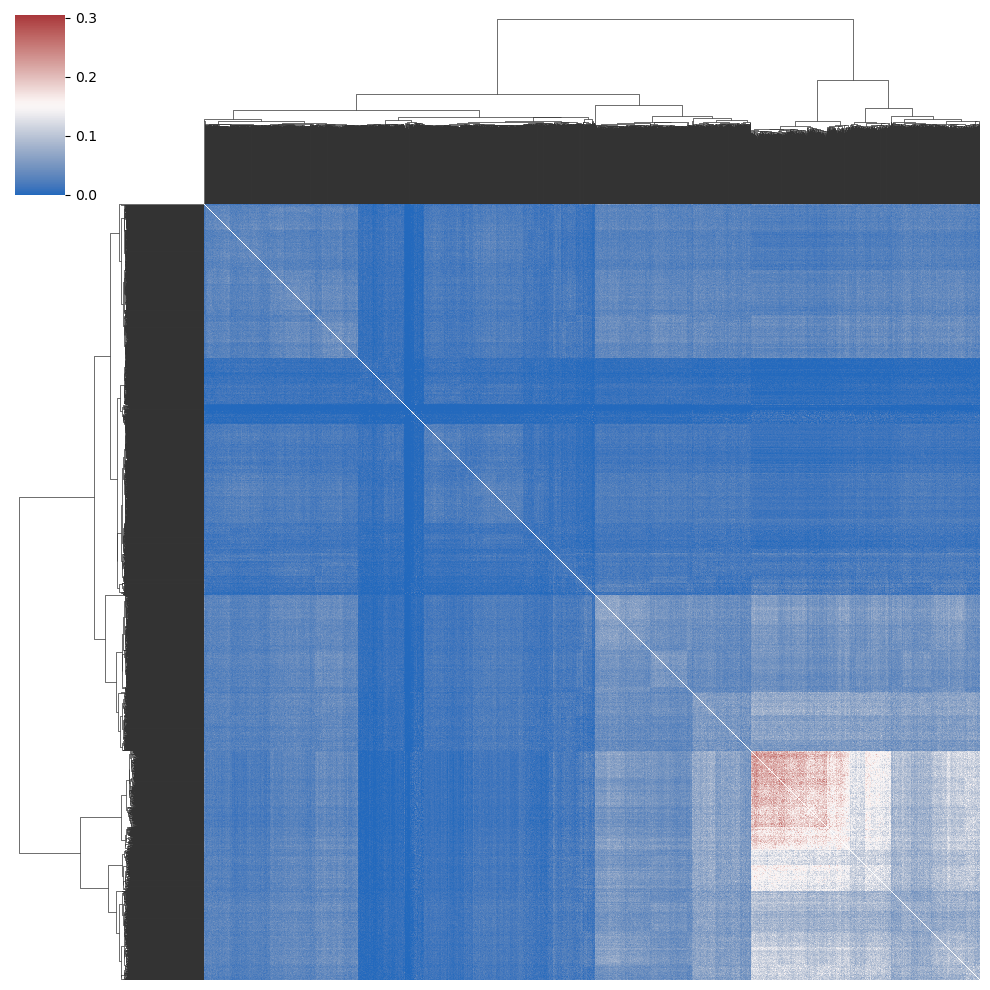

In [4]:
p1 = sns.clustermap(jaccard_index_Mat_isoform, cmap = "vlag", mask=np.diag(np.ones(len(jaccard_index_Mat_isoform))),
               xticklabels = False, yticklabels = False)

In [5]:
reorder_id = p1.dendrogram_col.reordered_ind
reorder_index = jaccard_index_Mat_isoform.index[reorder_id]

threshold= 1.6
labels = fcluster(p1.dendrogram_row.linkage, threshold, criterion='distance')
labels = pd.Series(labels)
labels.index = jaccard_index_Mat_isoform.index
n_cluster = len(labels.unique())
print(n_cluster, "clusters")

pal = sns.husl_palette(n_cluster, s=.45)
color_map = dict(zip(labels.unique(), pal))
anno_colors = labels.map(color_map)

7 clusters


In [29]:
jaccard_index_Mat_isoform_index = jaccard_index_Mat_isoform
jaccard_index_Mat_isoform_index.insert(0, "cluster", labels)
len_no = jaccard_index_Mat_isoform_index.index[0].find("-")
jaccard_index_Mat_isoform_index.insert(0, "TFname", jaccard_index_Mat_isoform_index.index.str[len_no+1:])
# jaccard_index_Mat_isoform_index.insert(0, "TFname", jaccard_index_Mat_isoform_index.index.str.split('-').str[1])
jaccard_index_Mat_isoform_index.to_csv("../data/Dataset_TFAtlas/isoform/Jaccard_index_isoform_VS_isoform_"+str(n_cluster)+"cluster.csv", index = True, sep = ",")
jaccard_index_Mat_isoform_index

,TFname,cluster,TFORF0001-HIF3A,TFORF0002-HIF3A,TFORF0003-HIF3A,TFORF0004-HIF3A,TFORF0005-HIF3A,TFORF0006-TULP4,TFORF0007-TULP4,TFORF0008-ZNF709,...,TFORF3539-ZNF747,TFORF3540-TAL2,TFORF3541-THAP6,TFORF3542-ZNF720,TFORF3543-CSDC2,TFORF3544-NR2E1,TFORF3545-PIAS1,TFORF3546-TSC22D3,TFORF3547-CBFB,TFORF3548-THAP10
TFORF0001-HIF3A,HIF3A,4,1.000000,0.045946,0.059548,0.038728,0.053927,0.008086,0.063922,0.021552,...,0.057994,0.051118,0.051591,0.047160,0.044628,0.045570,0.052743,0.051205,0.060907,0.056899
TFORF0002-HIF3A,HIF3A,7,0.045946,1.000000,0.046914,0.044199,0.045322,0.010753,0.052770,0.031311,...,0.065076,0.094688,0.043173,0.050331,0.064133,0.030498,0.042254,0.064182,0.068053,0.070881
TFORF0003-HIF3A,HIF3A,4,0.059548,0.046914,1.000000,0.032541,0.030720,0.011070,0.041420,0.023468,...,0.046089,0.044223,0.073675,0.034449,0.042836,0.032110,0.053045,0.056088,0.047074,0.042092
TFORF0004-HIF3A,HIF3A,4,0.038728,0.044199,0.032541,1.000000,0.026706,0.013109,0.037483,0.014085,...,0.063636,0.046404,0.032520,0.044776,0.044226,0.042088,0.031291,0.058190,0.046332,0.042802
TFORF0005-HIF3A,HIF3A,4,0.053927,0.045322,0.030720,0.026706,1.000000,0.008785,0.064591,0.025157,...,0.040541,0.045375,0.058182,0.040816,0.039927,0.037889,0.038717,0.054455,0.045455,0.045872
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TFORF3544-NR2E1,NR2E1,4,0.045570,0.030498,0.032110,0.042088,0.037889,0.018182,0.040392,0.010471,...,0.050290,0.037475,0.038059,0.052304,0.037344,1.000000,0.047158,0.055970,0.043993,0.049828
TFORF3545-PIAS1,PIAS1,4,0.052743,0.042254,0.053045,0.031291,0.038717,0.014157,0.037563,0.021769,...,0.048387,0.043348,0.058676,0.049536,0.043478,0.047158,1.000000,0.058824,0.036794,0.034346
TFORF3546-TSC22D3,TSC22D3,6,0.051205,0.064182,0.056088,0.058190,0.054455,0.014553,0.060206,0.020362,...,0.118598,0.124294,0.059406,0.060651,0.144615,0.055970,0.058824,1.000000,0.063043,0.070953
TFORF3547-CBFB,CBFB,7,0.060907,0.068053,0.047074,0.046332,0.045455,0.009363,0.058904,0.018256,...,0.071264,0.076739,0.051867,0.053498,0.068182,0.043993,0.036794,0.063043,1.000000,0.072289


/home/zhiyuanlab/miniconda3/envs/test3_wq/lib/python3.10/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/home/zhiyuanlab/miniconda3/envs/test3_wq/lib/python3.10/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


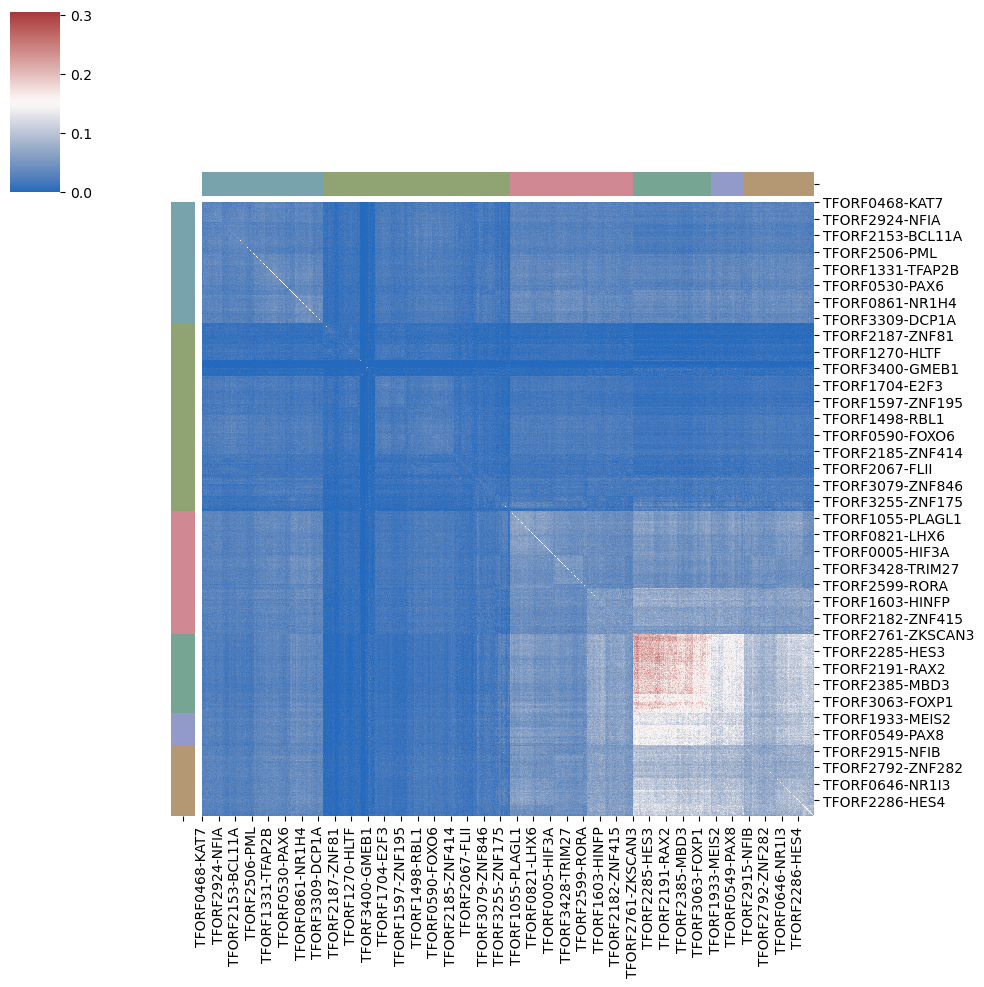

In [7]:
p = sns.clustermap(jaccard_index_Mat_isoform, cmap = "vlag", mask=np.diag(np.ones(len(jaccard_index_Mat_isoform))),
                #    xticklabels = False, yticklabels = False, 
                   col_colors = anno_colors, row_colors = anno_colors)
p.ax_row_dendrogram.set_visible(False)
p.ax_col_dendrogram.set_visible(False)
plt.savefig("../data/Dataset_TFAtlas/image/isoform/jaccard_index_Mat_"+str(len(jaccard_index_Mat_isoform))+"isoform_"+str(len(jaccard_index_Mat_isoform))+"isoform_"+str(n_cluster)+"cluster_rowname.png", dpi=600, bbox_inches = "tight")

In [169]:
# jaccard_index_Mat_isoform_index = pd.read_csv("../data/Dataset_TFAtlas/isoform/Jaccard_index_isoform_VS_isoform_"+str(n_cluster)+"cluster.csv", index_col=0)
jaccard_index_Mat_isoform_index = pd.read_csv("../data/Dataset_TFAtlas/isoform/Jaccard_index_isoform_VS_isoform_6cluster.csv", index_col=0)

In [170]:
n_cluster = 6

In [171]:
# focus to cluster 4
cluster_focus = 4
isoform_list_focus = jaccard_index_Mat_isoform_index.loc[jaccard_index_Mat_isoform_index.cluster == cluster_focus, ]
isoform_list_focus.insert(0, "isoform", isoform_list_focus.index)
isoform_list_focus = isoform_list_focus.loc[:, ["isoform", "TFname"]]
isoform_list_focus

,isoform,TFname
TFORF0015-DRAP1,TFORF0015-DRAP1,DRAP1
TFORF0032-GSC2,TFORF0032-GSC2,GSC2
TFORF0038-SP7,TFORF0038-SP7,SP7
TFORF0039-SP7,TFORF0039-SP7,SP7
TFORF0046-MAX,TFORF0046-MAX,MAX
...,...,...
TFORF3447-MYCBP,TFORF3447-MYCBP,MYCBP
TFORF3500-BATF3,TFORF3500-BATF3,BATF3
TFORF3528-NME2,TFORF3528-NME2,NME2
TFORF3535-MLLT10,TFORF3535-MLLT10,MLLT10


In [172]:
focus_isoform_num = len(isoform_list_focus)
focus_TF = set(isoform_list_focus.TFname)
focus_TF_num = len(focus_TF)
print("Focus cluster include", focus_isoform_num, "isoforms of", focus_TF_num, "TFs")

Focus cluster include 417 isoforms of 283 TFs


283


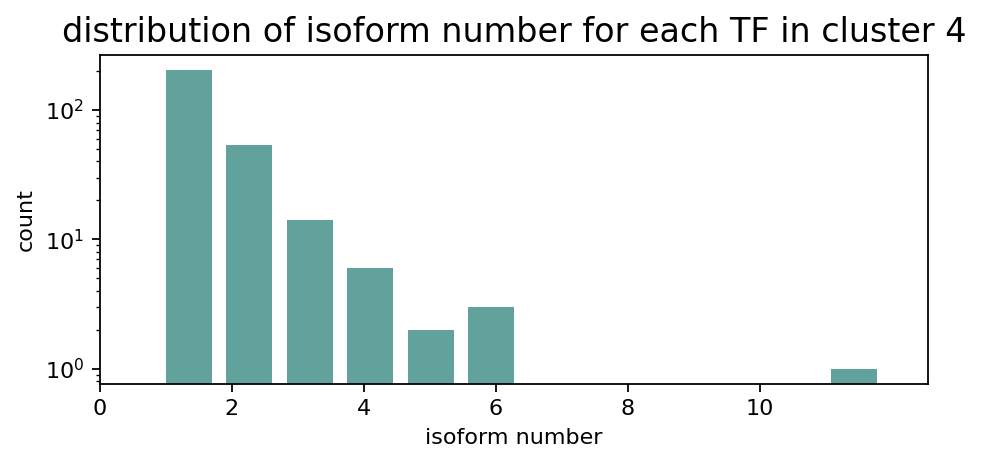

In [174]:
# plot distribution of isoform number for each TF
isoform_count_dict = {}
for TF in focus_TF:
    tmp = isoform_list_focus.loc[isoform_list_focus.TFname == TF]
    isoform_count_dict[TF] = len(tmp)
print(len(isoform_count_dict))
isoform_count = pd.DataFrame()
isoform_count["TF"] = isoform_count_dict.keys()
isoform_count["isoform_count"] = isoform_count_dict.values()
# plot
plt.figure(figsize=(6, 3), dpi=160)
plt.hist(isoform_count["isoform_count"], bins = max(isoform_count["isoform_count"]), width = 0.7, color = "#62a29c")
plt.ylabel("count", fontsize=10)
plt.xlabel("isoform number", fontsize=10)   
plt.xticks(range(0, max(isoform_count["isoform_count"]), 2))
# plt.yticks(range(0, 250, 50))
plt.yscale("log")
plt.title("distribution of isoform number for each TF in cluster "+str(cluster_focus), fontsize=15)  
plt.tight_layout() 
plt.savefig('../data/Dataset_TFAtlas/image/isoform/isoform_number_distribution_cluster'+str(cluster_focus)+'.png')

In [175]:
# merge with unique ratio
TF_isoform_unique_interaction = pd.read_csv("../data/Section5_Isoform/unique_interaction_isoform_byTF.csv", index_col=0)
TF_isoform_unique_interaction.insert(2, "in cluster4", np.zeros(len(TF_isoform_unique_interaction)))
TF_isoform_unique_interaction.index = TF_isoform_unique_interaction.TFname
for TF in isoform_count_dict.keys():
    TF_isoform_unique_interaction.loc[TF, "in cluster4"] = isoform_count_dict[TF]

TF_isoform_unique_interaction.insert(3, "in cluster4 ratio", TF_isoform_unique_interaction["in cluster4"] / TF_isoform_unique_interaction["count"])

TF_isoform_unique_interaction.to_csv("../data/Section5_Isoform/unique_interaction_isoform_byTF_clusterinfo.csv", index = True, sep = ",")
TF_isoform_unique_interaction

,TFname,count,in cluster4,in cluster4 ratio,unique_interaction_count_mean,unique_interaction_count_var,unique_interaction_count_std,unique_interaction_count_max,unique_interaction_count_min,unique_interaction_ratio_mean,unique_interaction_ratio_var,unique_interaction_ratio_std,unique_interaction_ratio_max,unique_interaction_ratio_min,unique_interaction_count_cv,unique_interaction_count_range,unique_interaction_ratio_cv,unique_interaction_ratio_range
TFname,,,,,,,,,,,,,,,,,,
AATF,AATF,1,0.0,0.0,534.0,NaN,NaN,534,534,1.000000,NaN,NaN,1.000000,1.000000,NaN,0,NaN,0.000000
ABL1,ABL1,1,0.0,0.0,220.0,NaN,NaN,220,220,1.000000,NaN,NaN,1.000000,1.000000,NaN,0,NaN,0.000000
ACTL6A,ACTL6A,2,0.0,0.0,384.5,28560.5,168.998521,504,265,0.913905,0.001215,0.034850,0.938547,0.889262,0.439528,239,0.038133,0.049286
ADAR,ADAR,2,0.0,0.0,497.0,48050.0,219.203102,652,342,0.963618,0.000241,0.015516,0.974589,0.952646,0.441053,310,0.016102,0.021943
ADNP2,ADNP2,1,0.0,0.0,343.0,NaN,NaN,343,343,1.000000,NaN,NaN,1.000000,1.000000,NaN,0,NaN,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZSCAN9,ZSCAN9,1,0.0,0.0,615.0,NaN,NaN,615,615,1.000000,NaN,NaN,1.000000,1.000000,NaN,0,NaN,0.000000
ZXDA,ZXDA,1,0.0,0.0,500.0,NaN,NaN,500,500,1.000000,NaN,NaN,1.000000,1.000000,NaN,0,NaN,0.000000
ZXDB,ZXDB,1,0.0,0.0,147.0,NaN,NaN,147,147,1.000000,NaN,NaN,1.000000,1.000000,NaN,0,NaN,0.000000


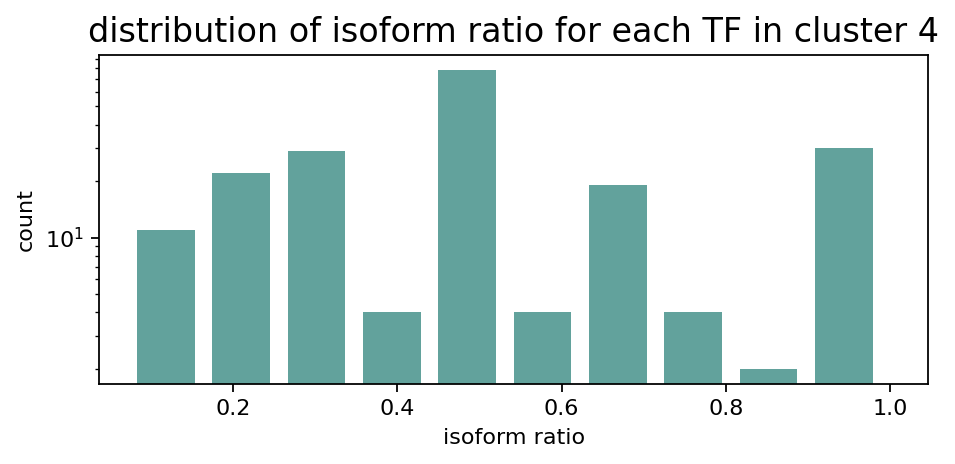

In [177]:
# TFs in cluster 4
focus_ratio = TF_isoform_unique_interaction.loc[list(focus_TF), :]
focus_ratio = focus_ratio.loc[focus_ratio["count"] >1, :]
# plot
plt.figure(figsize=(6, 3), dpi=160)
plt.hist(focus_ratio["in cluster4 ratio"], bins = 10, width = 0.07, color = "#62a29c")
plt.ylabel("count", fontsize=10)
plt.xlabel("isoform ratio", fontsize=10)   
# plt.xticks(range(0, max(TF_isoform_unique_interaction["in cluster4 ratio"]), 2))
# plt.yticks(range(0, 250, 50))
plt.yscale("log")
plt.title("distribution of isoform ratio for each TF in cluster "+str(cluster_focus), fontsize=15)  
plt.tight_layout() 
plt.savefig('../data/Dataset_TFAtlas/image/isoform/isoform_ratio_distribution_cluster'+str(cluster_focus)+'.pdf')

30 TFs with 100% isoforms in cluster 4


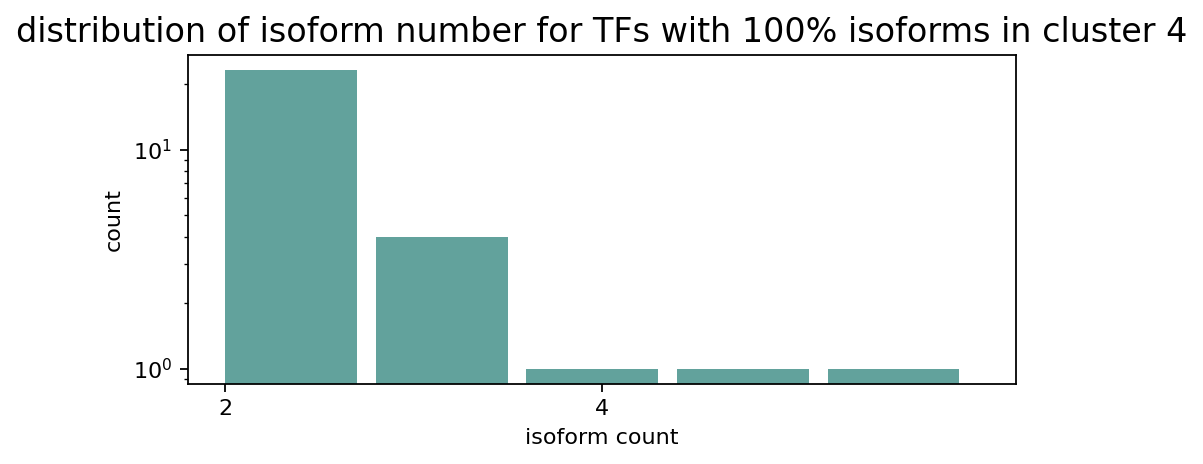

In [179]:
# focus on TF with 100% isoform in cluster4
focus_ratio_full = focus_ratio.loc[focus_ratio["in cluster4 ratio"] == 1,:]
print(len(focus_ratio_full), "TFs with 100% isoforms in cluster 4")

# plot
plt.figure(figsize=(6, 3), dpi=160)
plt.hist(focus_ratio_full["count"], bins = 5, width = 0.7, color = "#62a29c")
plt.ylabel("count", fontsize=10)
plt.xlabel("isoform count", fontsize=10)   
plt.xticks(range(2, max(focus_ratio_full["count"]), 2))
# plt.yticks(range(0, 250, 50))
plt.yscale("log")
plt.title("distribution of isoform number for TFs with 100% isoforms in cluster "+str(cluster_focus), fontsize=15)  
plt.tight_layout() 
plt.savefig('../data/Dataset_TFAtlas/image/isoform/isoform_number_distribution_cluster'+str(cluster_focus)+'_ratio=1.png')

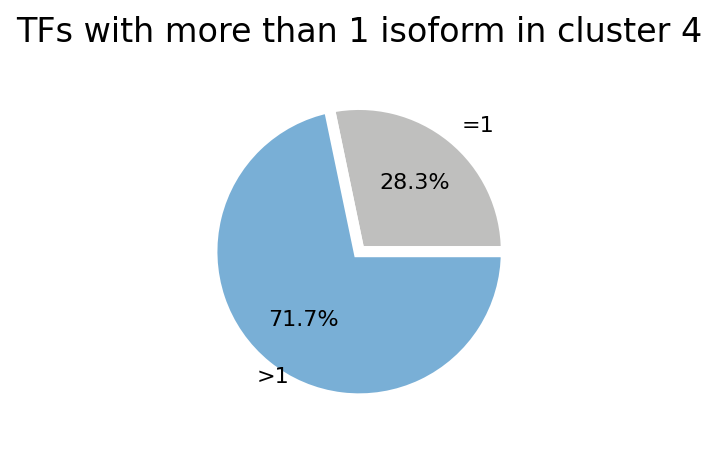

In [181]:
# check TF ratio with >1 isoform
# in cluster 4
focus_TF_stat = TF_isoform_unique_interaction.loc[list(focus_TF), :]
focus_TF_number_count = focus_TF_stat['count'].value_counts()
focus_TF_number_count = focus_TF_number_count.sort_index()
focus_TF_number_count

# =1, >1
ratio = [focus_TF_number_count[1]/sum(focus_TF_number_count), (sum(focus_TF_number_count)-focus_TF_number_count[1])/sum(focus_TF_number_count)]

# colors = plt.get_cmap('Blues')(np.linspace(0.2, 0.7, len(focus_TF_number_count)))
colors = ["#bfbfbe", "#79afd6"]
explode = [0, 0.2] # 只爆炸1，爆炸距离是半径的0.2。
 
fig, ax = plt.subplots(figsize=(5, 3), dpi=160)
ax.pie(ratio, colors=colors, radius=3, center=(4, 4), labels=["=1", ">1"], # explode=explode,
       wedgeprops={"linewidth": 5, "edgecolor": "white"}, autopct='%.1f%%', frame=True)
 
ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
       ylim=(0, 8), yticks=np.arange(1, 8))
ax.set_axis_off()
plt.title("TFs with more than 1 isoform in cluster "+str(cluster_focus), fontsize=15) 

plt.tight_layout() 
plt.savefig('../data/Dataset_TFAtlas/image/isoform/isoform_number_pie_cluster'+str(cluster_focus)+'.pdf')

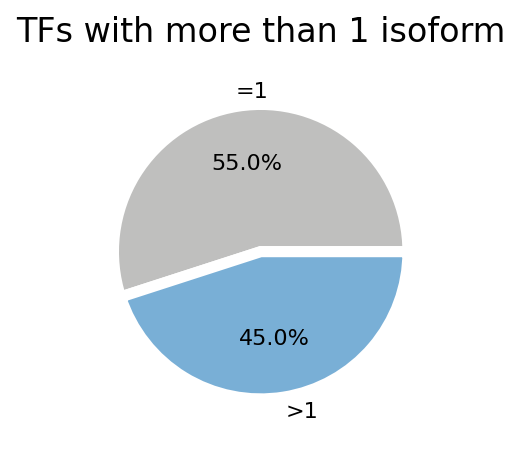

In [110]:
# check TF ratio with >1 isoform
# in all TFs
TF_number_count = TF_isoform_unique_interaction['count'].value_counts()
TF_number_count = TF_number_count.sort_index()
TF_number_count

# =1, >1
ratio = [TF_number_count[1]/sum(TF_number_count), (sum(TF_number_count)-TF_number_count[1])/sum(TF_number_count)]

# colors = plt.get_cmap('Blues')(np.linspace(0.2, 0.7, len(TF_number_count)))
colors = ["#bfbfbe", "#79afd6"]
explode = [0, 0.2] # 只爆炸1，爆炸距离是半径的0.2。
 
fig, ax = plt.subplots(figsize=(5, 3), dpi=160)
ax.pie(ratio, colors=colors, radius=3, center=(4, 4), labels=["=1", ">1"], #explode=explode, 
       wedgeprops={"linewidth": 5, "edgecolor": "white"}, autopct='%.1f%%', frame=True)
 
ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
       ylim=(0, 8), yticks=np.arange(1, 8))
ax.set_axis_off()
plt.title("TFs with more than 1 isoform", fontsize=15) 

plt.tight_layout() 
plt.savefig('../data/Dataset_TFAtlas/image/isoform/isoform_number_pie_all.pdf')

In [182]:
# check if isoform with the highest jaccard index is the same TF
# in cluster 4
jaccard_index_Mat_isoform_focus = jaccard_index_Mat_isoform.loc[isoform_list_focus.isoform, isoform_list_focus.isoform]
np.fill_diagonal(jaccard_index_Mat_isoform_focus.values, 0)
isoform_focus_max_index = jaccard_index_Mat_isoform_focus.idxmax()
for isoform in isoform_list_focus["isoform"]:
    isoform_list_focus.loc[isoform, "max_isoform"] = isoform_focus_max_index[isoform]
isoform_list_focus["max_name"] = isoform_list_focus.max_isoform.str[len_no+1:]
isoform_list_focus["max_same_TF"] = isoform_list_focus["TFname"] == isoform_list_focus["max_name"]
isoform_list_focus

,isoform,TFname,max_isoform,max_name,max_same_TF
TFORF0015-DRAP1,TFORF0015-DRAP1,DRAP1,TFORF0046-MAX,MAX,False
TFORF0032-GSC2,TFORF0032-GSC2,GSC2,TFORF0081-KCNIP2,KCNIP2,False
TFORF0038-SP7,TFORF0038-SP7,SP7,TFORF2439-YEATS4,YEATS4,False
TFORF0039-SP7,TFORF0039-SP7,SP7,TFORF1515-NANOGNB,NANOGNB,False
TFORF0046-MAX,TFORF0046-MAX,MAX,TFORF1255-TP53,TP53,False
...,...,...,...,...,...
TFORF3447-MYCBP,TFORF3447-MYCBP,MYCBP,TFORF2515-PDCD2,PDCD2,False
TFORF3500-BATF3,TFORF3500-BATF3,BATF3,TFORF1549-TAZ,TAZ,False
TFORF3528-NME2,TFORF3528-NME2,NME2,TFORF0111-SMAD7,SMAD7,False
TFORF3535-MLLT10,TFORF3535-MLLT10,MLLT10,TFORF0830-SLC45A2,SLC45A2,False


In [157]:
# check if isoform with the highest jaccard index is the same TF
# in all
jaccard_index_Mat_isoform_tmp = jaccard_index_Mat_isoform.copy()
np.fill_diagonal(jaccard_index_Mat_isoform_tmp.values, 0)
isoform_max_index = jaccard_index_Mat_isoform_tmp.idxmax()

isoform_list_stat = pd.DataFrame({"isoform": isoform_list})
isoform_list_stat.index = isoform_list_stat["isoform"]
isoform_list_stat["TFname"] = isoform_list_stat.isoform.str[len_no+1:]
for isoform in isoform_list_stat["isoform"]:
    isoform_list_stat.loc[isoform, "max_isoform"] = isoform_max_index[isoform]
isoform_list_stat["max_name"] = isoform_list_stat.max_isoform.str[len_no+1:]
isoform_list_stat["max_same_TF"] = isoform_list_stat["TFname"] == isoform_list_stat["max_name"]
isoform_list_stat

,isoform,TFname,max_isoform,max_name,max_same_TF
isoform,,,,,
TFORF0001-HIF3A,TFORF0001-HIF3A,HIF3A,TFORF2286-HES4,HES4,False
TFORF0002-HIF3A,TFORF0002-HIF3A,HIF3A,TFORF0304-CREM,CREM,False
TFORF0003-HIF3A,TFORF0003-HIF3A,HIF3A,TFORF2855-MAPK8IP1,MAPK8IP1,False
TFORF0004-HIF3A,TFORF0004-HIF3A,HIF3A,TFORF0207-FOXP2,FOXP2,False
TFORF0005-HIF3A,TFORF0005-HIF3A,HIF3A,TFORF1706-E2F1,E2F1,False
...,...,...,...,...,...
TFORF3544-NR2E1,TFORF3544-NR2E1,NR2E1,TFORF0825-LHX8,LHX8,False
TFORF3545-PIAS1,TFORF3545-PIAS1,PIAS1,TFORF1722-DMRT3,DMRT3,False
TFORF3546-TSC22D3,TFORF3546-TSC22D3,TSC22D3,TFORF0942-LMO1,LMO1,False


In [183]:
# check ratio in TFs with more than one isoform
# in cluster 4, all isoform in cluster 4
allin_focus_isoforms =  isoform_list_focus.loc[isoform_list_focus["TFname"].isin(focus_ratio_full["TFname"]),:]
identical_isoform_focus = isoform_list_focus.loc[isoform_list_focus["max_same_TF"] == True,:]
identical_isoform_focus = identical_isoform_focus.loc[identical_isoform_focus["isoform"].isin(allin_focus_isoforms["isoform"]),:]
identical_ratio_focus = len(identical_isoform_focus) / len(allin_focus_isoforms)

# overall
sum_isoform_multi = sum(TF_isoform_unique_interaction.loc[TF_isoform_unique_interaction["count"]>1, "count"])
identical_ratio = isoform_list_stat['max_same_TF'].eq(True).sum() / sum_isoform_multi

print("in cluster 4:", identical_ratio_focus, "(", len(identical_isoform_focus), "in", len(allin_focus_isoforms), ")")
print("overall:", identical_ratio, "(", isoform_list_stat['max_same_TF'].eq(True).sum(), "in", sum_isoform_multi, ")")

in cluster 4: 0.0547945205479452 ( 4 in 73 )
overall: 0.006938421509106678 ( 16 in 2306 )
